In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpb
import os
import re
import seaborn as sea

In [8]:
os.path.isfile(r'C:\Users\48730\Downloads\AirBnb_data\Airbnb_Open_Data.csv')

True

In [9]:
original = pd.read_csv(r'C:\Users\48730\Downloads\AirBnb_data\Airbnb_Open_Data.csv')

C:\Users\48730\AppData\Local\Temp\ipykernel_22152\2365179328.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  original = pd.read_csv(r'C:\Users\48730\Downloads\AirBnb_data\Airbnb_Open_Data.csv')


In [10]:
air = original.copy()

In [11]:
#Inspection starts..........

In [12]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [19]:
air.shape

(102599, 26)

In [21]:
air.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [22]:
air['license'].unique()

array([nan, '41662/AL'], dtype=object)

In [25]:
air['neighbourhood'].head(20)

0             Kensington
1                Midtown
2                 Harlem
3           Clinton Hill
4            East Harlem
5            Murray Hill
6     Bedford-Stuyvesant
7     Bedford-Stuyvesant
8         Hell's Kitchen
9        Upper West Side
10             Chinatown
11       Upper West Side
12        Hell's Kitchen
13           South Slope
14       Upper West Side
15          West Village
16          Williamsburg
17           Fort Greene
18               Chelsea
19         Crown Heights
Name: neighbourhood, dtype: object

In [27]:
air['host_identity_verified'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 102599 entries, 0 to 102598
Series name: host_identity_verified
Non-Null Count   Dtype 
--------------   ----- 
102310 non-null  object
dtypes: object(1)
memory usage: 801.7+ KB


In [29]:
air.iloc[10000]

id                                                                          6524336
NAME                                             Cozy One BR in Queens near Airport
host id                                                                 56495168791
host_identity_verified                                                     verified
host name                                                                    Falana
neighbourhood group                                                          Queens
neighbourhood                                                               Jamaica
lat                                                                        40.68547
long                                                                      -73.78924
country                                                               United States
country code                                                                     US
instant_bookable                                                            

In [54]:
air[air['NAME'].str.contains(r'\d',na=False)].tail(20)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102536,6060404,Relaxing bedroom in 6br apartment,61210811059,unconfirmed,John,Brooklyn,Bushwick,40.69034,-73.91666,United States,...,$14,1.0,1.0,7/28/2015,0.02,1.0,1.0,73.0,Overall please treat the apartment as you woul...,NaN
102537,6060956,W.B. Spacious Contemporary Living 3,79954723919,unconfirmed,Glender,Brooklyn,Bushwick,40.69690,-73.93435,United States,...,$199,2.0,46.0,5/7/2019,0.94,2.0,3.0,373.0,NaN,NaN
102560,6073659,Airy Living Room | 15 min. to GC,9598659400,verified,Sarah,Queens,Sunnyside,40.74439,-73.92163,United States,...,$138,1.0,1.0,6/28/2015,0.02,5.0,2.0,326.0,Please remember that this is a residential bui...,NaN
102562,6074764,1 bdr in the heart of Harlem,31012769204,verified,Jonathan,Manhattan,Harlem,40.81054,-73.94447,United States,...,$163,1.0,0.0,NaN,NaN,3.0,1.0,161.0,Absolutely no smoking in or around apartment. ...,NaN
102563,6075316,Large 1Br Apt + Balcony in LES!,59240106692,unconfirmed,Elena,Manhattan,Lower East Side,40.72115,-73.98308,United States,...,$32,5.0,1.0,9/16/2015,0.02,2.0,1.0,133.0,NaN,NaN
102565,6076421,BROWNSTONE DUPLEX HUGE 1 BEDROOM,22326090286,unconfirmed,Irving,Brooklyn,Bedford-Stuyvesant,40.68302,-73.94232,United States,...,$173,5.0,25.0,6/3/2019,0.53,3.0,2.0,301.0,NO Smoking.,NaN
102568,6078078,Furnished Bedroom in 2 Bedroom apt.,43698780331,verified,Etkin,Queens,Long Island City,40.75600,-73.92050,United States,...,$210,7.0,0.0,NaN,NaN,4.0,1.0,34.0,NaN,NaN
102569,6078630,"Elegant 1BR, Private Bath in Brownstone",37385825013,verified,Emily And Joel,Brooklyn,Park Slope,40.66880,-73.97865,United States,...,$197,1.0,184.0,2/10/2019,3.86,4.0,4.0,407.0,NO Smoking,NaN
102571,6079735,Sunny 1BR on UES.,12171515616,verified,Vitaly,Manhattan,Upper East Side,40.77098,-73.95034,United States,...,$163,1.0,76.0,6/23/2019,1.61,2.0,1.0,79.0,NaN,NaN
102572,6080287,Bright spacious 1BR w high ceilings,39863828636,verified,James,Manhattan,Upper West Side,40.78550,-73.97642,United States,...,$127,1.0,0.0,NaN,NaN,3.0,1.0,380.0,NaN,NaN


In [ ]:
#Cleaning started///////////////////

In [56]:
air.drop(columns=['house_rules','license'],inplace=True)

In [58]:
air.drop(columns='country code',inplace=True)

In [60]:
air.drop(columns='country',inplace=True)

In [62]:
air.drop(columns='reviews per month',inplace=True)

In [64]:
air.columns=air.columns.str.strip().str.capitalize().str.replace(r' ','_')

In [66]:
air.rename(columns={'Lat':'Lattitude'},inplace=True)
air.rename(columns={'Long':'Longitude'},inplace=True)

In [68]:
air['Construction_year']=pd.to_datetime(air['Construction_year'],errors='coerce')
air['Last_review']=pd.to_datetime(air['Last_review'],errors='coerce')

In [70]:
#Cleaning values started////////

In [130]:
air['Price']=air['Price'].replace(r'\,','',regex=True).fillna(0).astype(int)

In [128]:
air['Service_fee']=air['Service_fee'].str.strip().fillna(0).astype(int)

In [ ]:
air['Calculated_host_listings_count']=air['Calculated_host_listings_count'].fillna(0).astype(int)

In [ ]:
cols=['Number_of_reviews','Minimum_nights']
air[cols]=air[cols].apply(lambda col: col.fillna(0).astype(int))

In [85]:
air['Review_rate_number']=air['Review_rate_number'].fillna(0).astype(int)

In [87]:
air['Service_fee']=air['Service_fee'].fillna(0)
air['Last_review']=air['Last_review'].fillna(0)
air['Lattitude']=air['Lattitude'].fillna(0)
air['Longitude']=air['Longitude'].fillna(0)
cols=['Host_name','Neighbourhood_group','Neighbourhood','Instant_bookable','Cancellation_policy']
for col in cols:
    air[col]=air[col].fillna('Unknown').str.strip()

In [88]:
air['Cancellation_policy'].isna().value_counts()

Cancellation_policy
False    102599
Name: count, dtype: int64

In [89]:
#Cleaning all extra signs,imoji,spaces betw words "Name" and Servise_fee columns

In [93]:
air['Name']=air['Name'].str.replace(r'\s{2,}',' ',regex=True).str.strip()

In [94]:
air['Name']=air['Name'].replace(r'\s+([/,.!?\+\-\(\)])',r'\1',regex=True)

In [95]:
air['Name']=air['Name'].replace(r'([/,.!?\+\-\(\)])\s+',r'\1',regex=True)

In [97]:
air['Name']=air['Name'].replace(r'(\w)\.+',r'\1.',regex=True)

In [118]:
emoji_p = re.compile(
"["
"\U0001F600-\U0001F64F"
"\U0001F300-\U0001F5FF"
"\U0001F680-\U0001F6FF"
"\U0001F1E0-\U0001F1FF"
"\u2600-\u26FF"
"\u2700-\u27BF"
    "]+", flags=re.UNICODE)

air['Name']=air['Name'].str.replace(emoji_p,'',regex=True).str.strip()

In [ ]:
air['Name']=air['Name'].replace(r'•+',r'',regex=True).str.strip()

In [ ]:
air['Name']=air['Name'].str.capitalize()

In [126]:
air['Service_fee']=air['Service_fee'].str.replace(r'\$','',regex=True).str.strip()
air['Price']=air['Price'].str.replace(r'\$','',regex=True).str.strip()


In [ ]:
# filling Host_id_verif colmn with unkown using 3 cols.

In [104]:
air['Host_identity_verified'] = air['Host_identity_verified'].fillna('unknown')

In [106]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Id                              102599 non-null  int64         
 1   Name                            102349 non-null  object        
 2   Host_id                         102599 non-null  int64         
 3   Host_identity_verified          102599 non-null  object        
 4   Host_name                       102599 non-null  object        
 5   Neighbourhood_group             102599 non-null  object        
 6   Neighbourhood                   102599 non-null  object        
 7   Lattitude                       102599 non-null  float64       
 8   Longitude                       102599 non-null  float64       
 9   Instant_bookable                105 non-null     object        
 10  Cancellation_policy             102599 non-null  object 

In [134]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Id                              102599 non-null  int64         
 1   Name                            102349 non-null  object        
 2   Host_id                         102599 non-null  int64         
 3   Host_identity_verified          102599 non-null  object        
 4   Host_name                       102599 non-null  object        
 5   Neighbourhood_group             102599 non-null  object        
 6   Neighbourhood                   102599 non-null  object        
 7   Lattitude                       102599 non-null  float64       
 8   Longitude                       102599 non-null  float64       
 9   Instant_bookable                105 non-null     object        
 10  Cancellation_policy             102599 non-null  object 

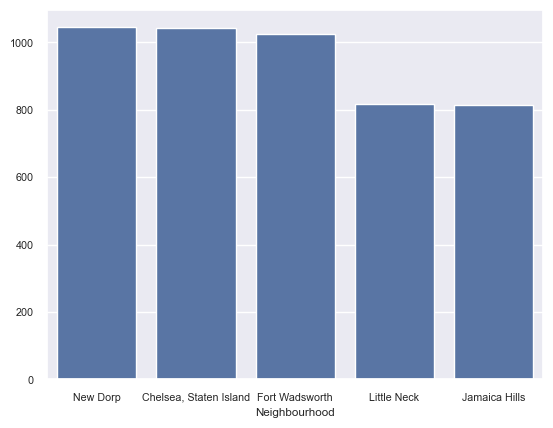

In [138]:
top5 = air.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(5)

sea.barplot(x=top5.index, y=top5.values)
sea.set_theme(font_scale=0.4)



In [140]:
air.to_csv('Cleaned_airbnb',index=False)

In [141]:
os.getcwd()

'C:\\Users\\48730'

In [142]:
folder='C:\\Users\\48730'

In [143]:
folder

'C:\\Users\\48730'